In [1]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and split dataset
#iris = load_iris()
df=pd.read_csv("C:/Users/DIPTIRANJAN BISWAL/Downloads/playgolf.csv")
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
inputs=df.drop('Play Golf',axis='columns')

In [4]:
target=df['Play Golf']

In [5]:
from sklearn.preprocessing import LabelEncoder

obj_comp=LabelEncoder()
obj_job=LabelEncoder()
obj_degree=LabelEncoder()
obj_windy=LabelEncoder()

In [6]:
inputs['out_new']=obj_comp.fit_transform(inputs['Outlook'])
inputs['temp_new']=obj_job.fit_transform(inputs['Temp'])
inputs['hum_new']=obj_degree.fit_transform(inputs['Humidity'])
inputs['win_new']=obj_degree.fit_transform(inputs['Windy'])

In [7]:
inputs_n=inputs.drop(['Outlook','Temp','Humidity','Windy'],axis='columns')

In [8]:
inputs_n

,out_new,temp_new,hum_new,win_new
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [9]:
X=inputs_n
y=target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
rf = RandomForestClassifier(n_estimators=4, random_state=42) 

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

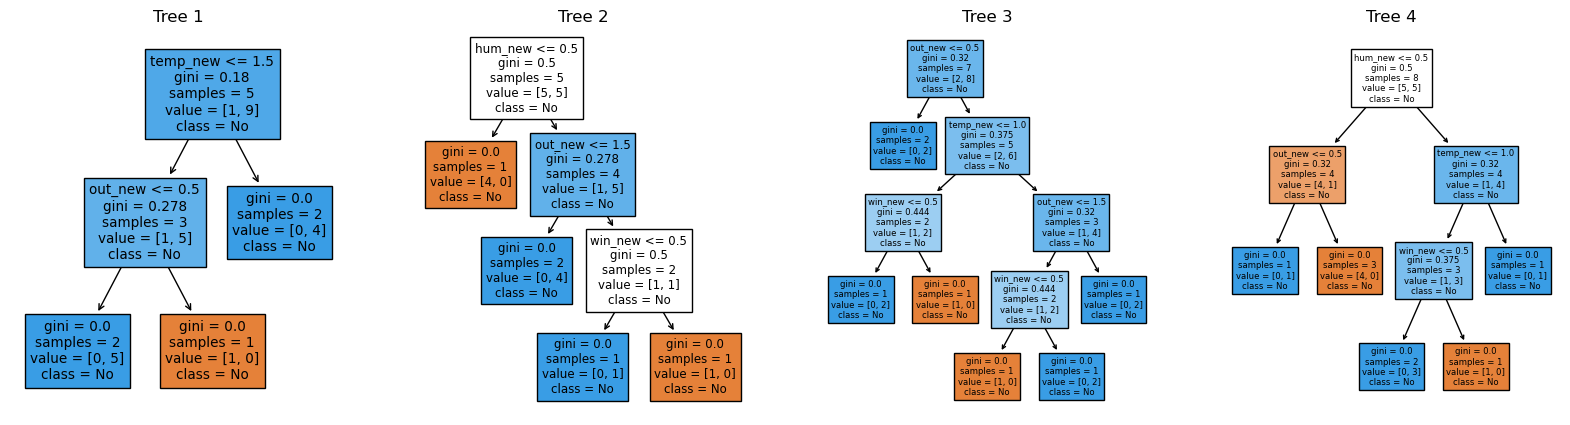

In [18]:
class_names = df["Play Golf"]
n_trees = len(rf.estimators_)
fig, axs = plt.subplots(1, n_trees, figsize=(20, 5))
for i, tree in enumerate(rf.estimators_):
    plot_tree(tree, 
              feature_names=X_train.columns,
              class_names=class_names,
              filled=True,
              ax=axs[i])
    axs[i].set_title(f"Tree {i+1}")

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [20]:
X_test

,out_new,temp_new,hum_new,win_new
9,2,2,1,0
11,0,2,0,1
0,1,1,0,0
12,0,1,1,0


In [21]:
sample = X_test.iloc[0].values.reshape(1, -1)

In [22]:
sample

array([[2, 2, 1, 0]], dtype=int64)

In [23]:
rf.predict([[2,2,1,0]])

C:\Users\DIPTIRANJAN BISWAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [24]:
tree_votes = [tree.predict(sample)[0] for tree in rf.estimators_]
print("Tree votes:", tree_votes)

Tree votes: [1.0, 1.0, 1.0, 1.0]


In [25]:
# Map 0 to 'no' and 1 to 'yes'
tree_votes_yes_no = ['yes' if vote == 1 else 'no' for vote in tree_votes]

# Join the results into a string for printing
tree_votes_str = ', '.join(tree_votes_yes_no)

# Print the tree votes in "yes" and "no"
print(f"Tree votes: {tree_votes_str}")


Tree votes: yes, yes, yes, yes


In [26]:
print("Actual label:", y_test[0])

Actual label: No
